In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import joblib
import os

Mounted at /content/drive


This dataset contains 10692 rental properties with 13 different characteristics:


* **city**: the city in which the property is located;
* **area**: area of the property;
* **rooms**: number of rooms;
* **bathroom**: number of bathrooms;
* **parking spaces**: number of parking spaces;
* **floor**: floor;
* **animals**: permission to stay with animals;
* **furniture**: furniture;

* **hoa (R$)** : homeowners association tax;

* **rent amount (R$)**: the amount of rent;

* **property tax**: Municipal property tax;
* **fire insurance (R$)**: the cost of fire insurance;

* **total (R$)**: the total sum of all values.

In [2]:
file_path = '/content/drive/My Drive/Colab Notebooks/Colab/Rent Brazil/rent.csv'
df = pd.read_csv(file_path)

df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

,0
city,0
area,0
rooms,0
bathroom,0
parking spaces,0
floor,0
animal,0
furniture,0
hoa (R$),0
rent amount (R$),0


In [5]:
df.shape

(10692, 13)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
hoa (R$),10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent amount (R$),10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property tax (R$),10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire insurance (R$),10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0
total (R$),10692.0,5490.487000,16484.725912,499.0,2061.75,3581.5,6768.0,1120000.0


In [7]:
 df.duplicated().sum()

358

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(10334, 13)

In [10]:
df = df.drop(['total (R$)'], axis=1)
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155


In [11]:
df = df.rename(columns={"bathroom": "bathrooms", "hoa (R$)": "hoa", "rent amount (R$)": "rent amount",  'property tax (R$)': 'property tax', 'fire insurance (R$)': 'fire insurance' }, errors="raise")
df

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155


# **The cost of renting an apartment depending on the number of rooms**

In [12]:
df['rooms'].describe()

,rooms
count,10334.000000
mean,2.539965
std,1.168185
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,13.000000


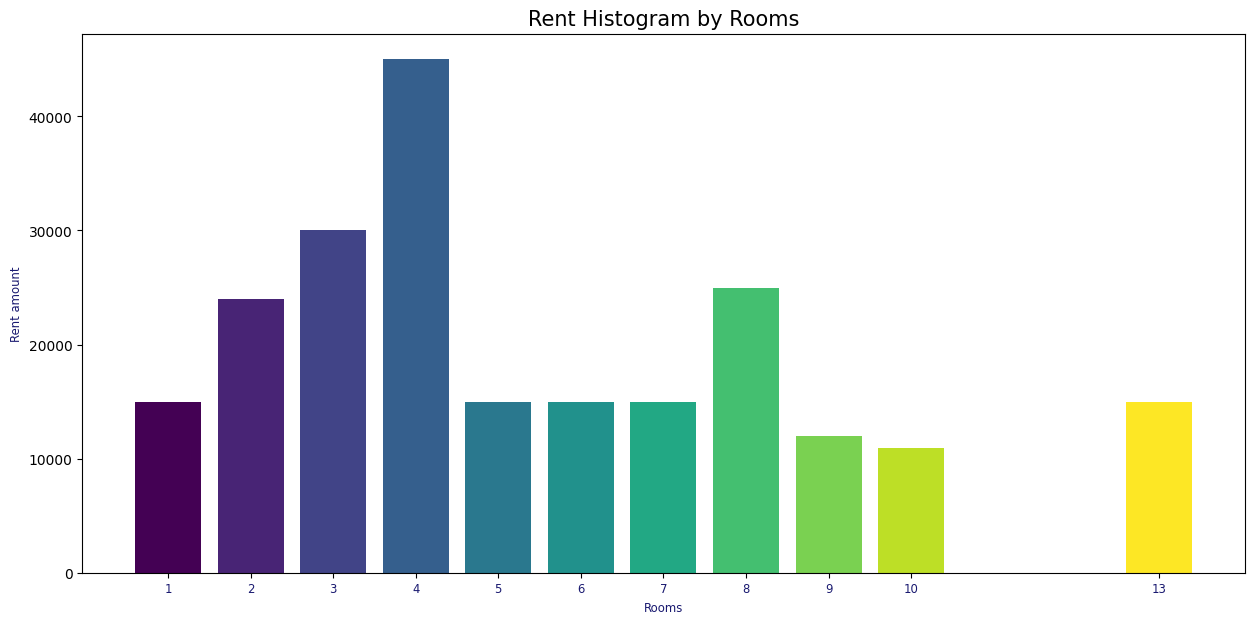

In [13]:
unique_rooms = sorted(df['rooms'].unique())

colors = plt.cm.viridis(np.linspace(0, 1, len(unique_rooms)))

color_map = dict(zip(unique_rooms, colors))

plt.figure(figsize=(15, 7))

plt.bar(
    df['rooms'],
    df['rent amount'],
    color=[color_map[room] for room in df['rooms']]
)

plt.xticks(unique_rooms, labels=unique_rooms, fontsize="small", rotation=0, color="midnightblue")

plt.xlabel("Rooms", fontsize="small", color="midnightblue")
plt.ylabel("Rent amount", fontsize="small", color="midnightblue")
plt.title("Rent Histogram by Rooms", fontsize=15)

plt.show()

# **Rental housing costs depending on the city**

In [14]:
df['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

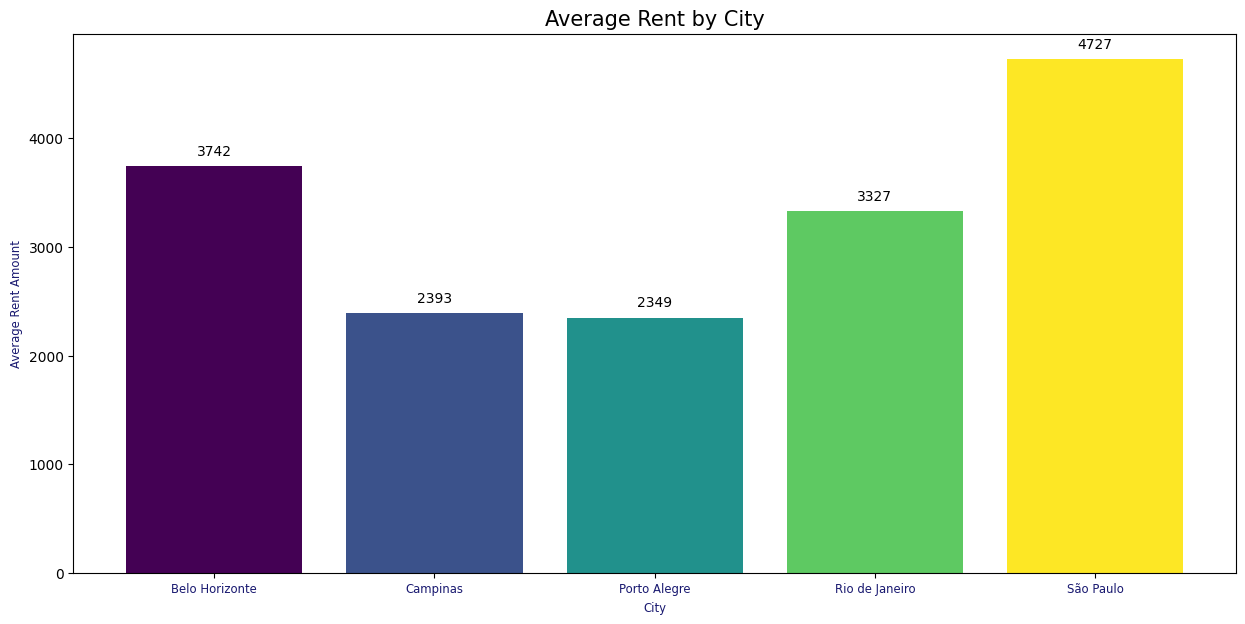

In [15]:
top_cities = df['city'].value_counts().head(5).index

filtered_df = df[df['city'].isin(top_cities)]

unique_city = sorted(filtered_df['city'].unique())

colors = plt.cm.viridis(np.linspace(0, 1, len(unique_city)))

color_map = dict(zip(unique_city, colors))

plt.figure(figsize=(15, 7))

average_rent = filtered_df.groupby('city')['rent amount'].mean()

bars = plt.bar(
    average_rent.index,
    average_rent.values,
    color=[color_map[city] for city in average_rent.index]
)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 100,
        f"{yval:.0f}",
        ha='center',
        fontsize=10,
        color="black"
    )

plt.xticks(fontsize="small", rotation=0, color="midnightblue")
plt.xlabel("City", fontsize="small", color="midnightblue")
plt.ylabel("Average Rent Amount", fontsize="small", color="midnightblue")
plt.title("Average Rent by City", fontsize=15)

plt.show()

# ✅ ***In São Paulo, the average cost of rent is higher than in other cities.***
# ***And this is not surprising, as it is the center of a large agglomeration with a population of 23 million, also one of the largest in the world.***

In [16]:
df['area'].describe()

,area
count,10334.000000
mean,152.439423
std,545.875595
min,11.000000
25%,59.000000
50%,95.000000
75%,190.000000
max,46335.000000


In [17]:
print(f'city', df["city"].unique())
print(f'rooms', df["rooms"].unique())
print(f'floor', df["floor"].unique())
print(f'parking spaces', df["parking spaces"].unique())
print(f'bathrooms', df["bathrooms"].unique())

city ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
rooms [ 2  4  1  3  7  5  8  6 10 13  9]
floor ['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']
parking spaces [ 1  0  7  4  2  6  3  8  5 10 12]
bathrooms [ 1  4  3  2  6  5  7  9  8 10]


In [18]:
df.head()

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11


In [19]:
# Selecting columns for encoding
columns_to_encode = ['animal', 'furniture', 'city']

 # Checking data types
print("Data types for encode:")
print(df[columns_to_encode].dtypes)

# Convert to str (if the data is of another type, such as int or float)
df[columns_to_encode] = df[columns_to_encode].astype(str)

encoder = OneHotEncoder(sparse_output=False)

encoded_array = encoder.fit_transform(df[columns_to_encode])

# Getting the names of new columns
encoded_columns = encoder.get_feature_names_out(columns_to_encode)

# Converting encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns, index=df.index)

# Delete original columns and add encoded ones
df = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

Data types for encode:
animal       object
furniture    object
city         object
dtype: object


In [20]:
num_zeros = (df['hoa'] == 0).sum()
print(f"Number of zero values in a column 'hoa': {num_zeros}")

Number of zero values in a column 'hoa': 2289


***In some cases, there may indeed be no hoa, e.g. for properties that are not part of an association (e.g. private houses).***

In [21]:
total_rows = df.shape[0]  #  Total number of lines
percent_zeros = (num_zeros / total_rows) * 100

print(f"Percentage of zero values: {percent_zeros:.2f}%")

Percentage of zero values: 22.15%


In [22]:
df.loc[:, 'floor'] = df["floor"].str.replace("-", "0").astype(int)

In [23]:
df.head()

,area,rooms,bathrooms,parking spaces,floor,hoa,rent amount,property tax,fire insurance,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,70,2,1,1,7,2065,3300,211,42,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,320,4,4,0,20,1200,4960,1750,63,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,80,1,1,1,6,1000,2800,0,41,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,51,2,1,0,2,270,1112,22,17,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,25,1,1,0,1,0,800,25,11,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [24]:
corr_matrix = df.corr()
corr_matrix

,area,rooms,bathrooms,parking spaces,floor,hoa,rent amount,property tax,fire insurance,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
area,1.000000,0.191251,0.224388,0.191421,-0.013849,0.009085,0.178228,0.038453,0.185652,0.038712,-0.038712,0.009249,-0.009249,0.040340,-0.006702,-0.030548,-0.032961,0.019823
rooms,0.191251,1.000000,0.730469,0.611634,-0.086562,0.020466,0.536632,0.073539,0.560907,0.165436,-0.165436,-0.075677,0.075677,0.163196,-0.045099,-0.111814,-0.090585,0.052824
bathrooms,0.224388,0.730469,1.000000,0.693952,0.000087,0.057297,0.665625,0.108083,0.673771,0.114685,-0.114685,0.023140,-0.023140,0.043868,-0.061693,-0.131209,-0.138350,0.184476
parking spaces,0.191421,0.611634,0.693952,1.000000,-0.026981,0.021100,0.573997,0.097159,0.593557,0.124266,-0.124266,-0.003788,0.003788,0.080771,-0.013507,-0.131419,-0.221236,0.192095
floor,-0.013849,-0.086562,0.000087,-0.026981,1.000000,0.029019,0.070565,0.012016,0.009841,-0.033619,0.033619,0.115293,-0.115293,-0.071354,-0.037587,-0.065597,0.014756,0.097904
hoa,0.009085,0.020466,0.057297,0.021100,0.029019,1.000000,0.052516,0.011267,0.042833,-0.013845,0.013845,0.009767,-0.009767,0.012555,-0.011642,-0.018415,0.000768,0.009356
rent amount,0.178228,0.536632,0.665625,0.573997,0.070565,0.052516,1.000000,0.106679,0.987203,0.064576,-0.064576,0.166975,-0.166975,-0.023730,-0.134701,-0.166836,-0.074592,0.246210
property tax,0.038453,0.073539,0.108083,0.097159,0.012016,0.011267,0.106679,1.000000,0.104473,-0.004238,0.004238,0.001147,-0.001147,-0.011168,-0.021015,-0.028077,-0.013946,0.046141
fire insurance,0.185652,0.560907,0.673771,0.593557,0.009841,0.042833,0.987203,0.104473,1.000000,0.076535,-0.076535,0.144082,-0.144082,0.004323,-0.131287,-0.129722,-0.087938,0.211976
animal_acept,0.038712,0.165436,0.114685,0.124266,-0.033619,-0.013845,0.064576,-0.004238,0.076535,1.000000,-1.000000,-0.081020,0.081020,-0.032663,0.019745,0.064797,0.018764,-0.043722


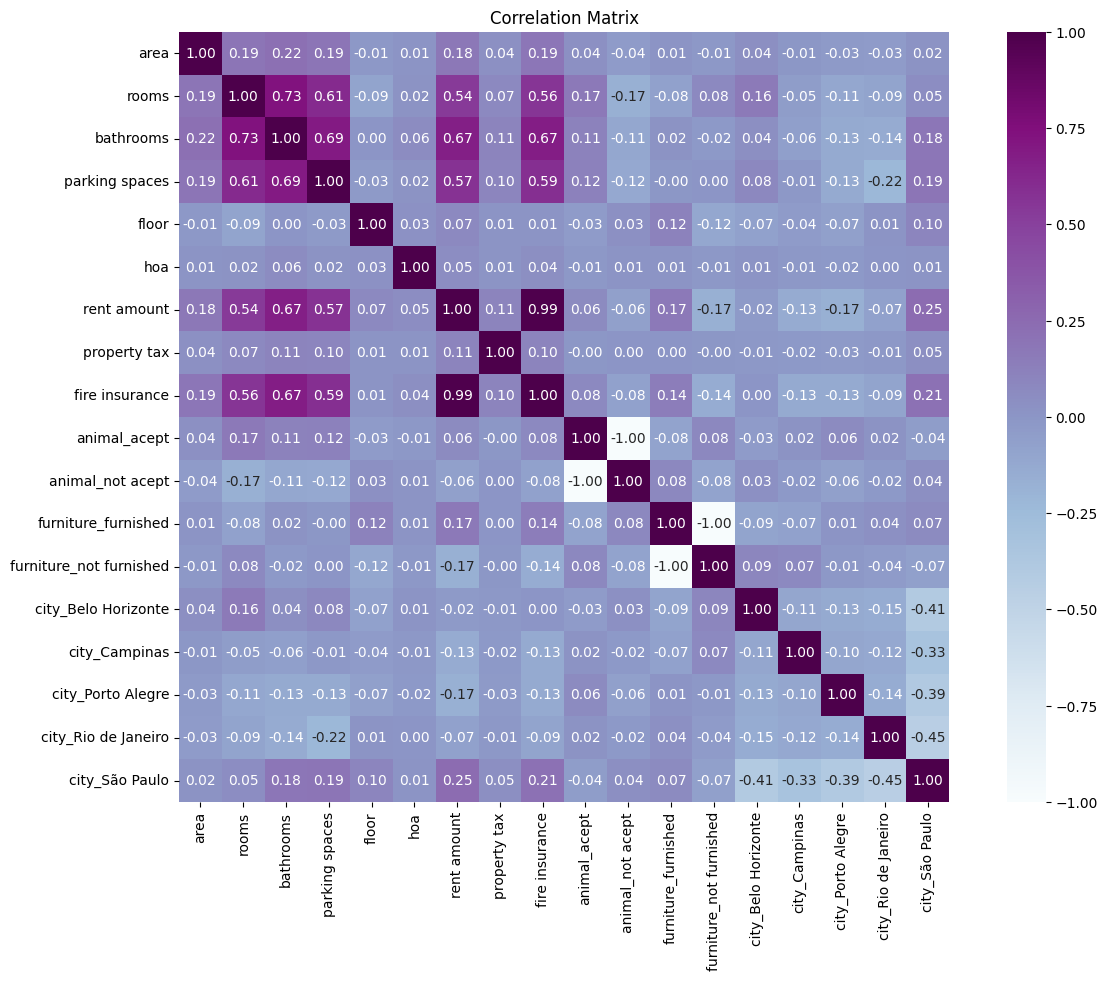

In [25]:
plt.figure(figsize=(15, 10))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt='.2f', square=True, cbar=True)
plt.show()

In [26]:
corr_rent_amount = corr_matrix['rent amount'].sort_values(ascending=False)
corr_rent_amount

,rent amount
rent amount,1.000000
fire insurance,0.987203
bathrooms,0.665625
parking spaces,0.573997
rooms,0.536632
city_São Paulo,0.246210
area,0.178228
furniture_furnished,0.166975
property tax,0.106679
floor,0.070565


<ipython-input-27-393b3bc63cc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_rent_amount.values, y=corr_rent_amount.index, palette="viridis")


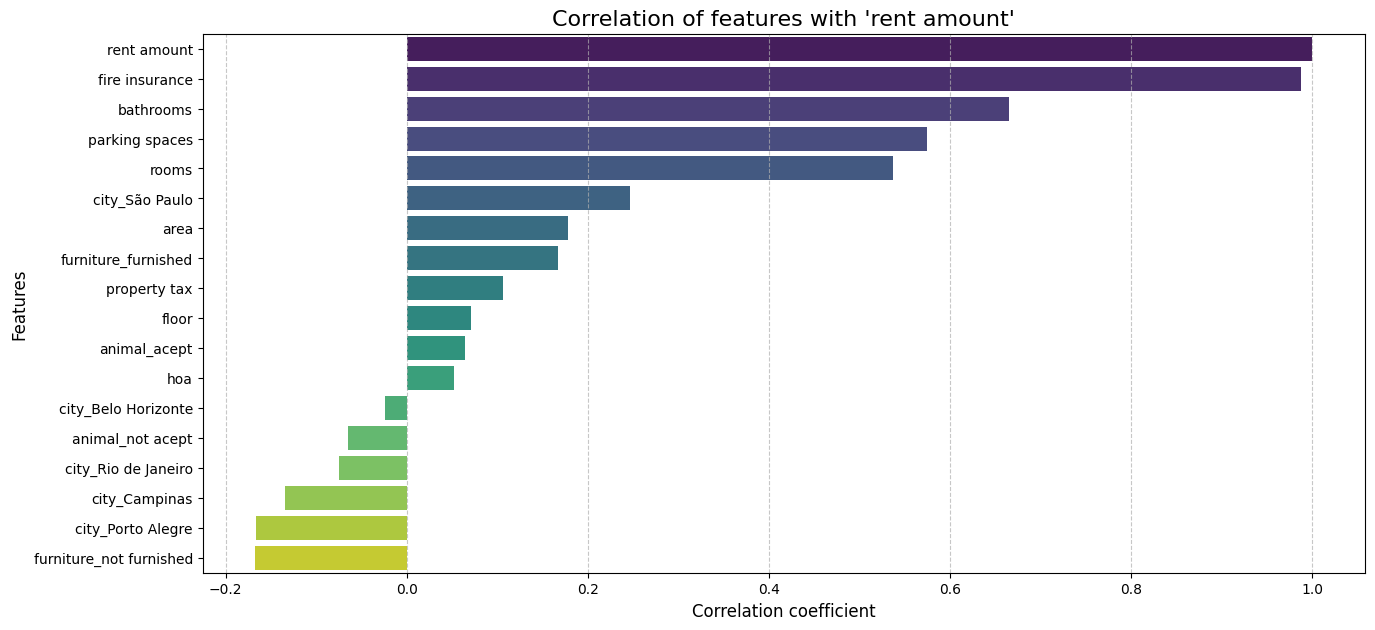

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

sns.barplot(x=corr_rent_amount.values, y=corr_rent_amount.index, palette="viridis")

plt.title("Correlation of features with 'rent amount'", fontsize=16)
plt.xlabel("Correlation coefficient", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

# ***Correlation analysis conclusions for rent amount:***

***Strong positive relationship***: Variables that are highly positively correlated with rent amount have a direct relationship. That is, when the value of these variables increases, the rent also increases.

* **fire insurance (0.987)**: Very strong correlation with rent amount. This is expected as the amount of insurance can be proportional to the rent.

* **bathrooms (0.666)**: Having more bathrooms is associated with higher rents. This indicates that living spaces with more amenities are more expensive.

* **parking spaces (0.574)**: Housing with parking spaces has higher rents, as it is often a sign of luxury or convenience.

* **rooms (0.537)**: A larger number of rooms is also associated with higher rents, which is consistent with the logic of larger areas.

* **City São Paulo (0.25)**: Location strongly influences higher rents.

***Weak positive relationship***:

* **area (0.178)**: Area has a moderate positive correlation, but is not a key factor. This may indicate that a larger area does not always mean significantly higher rents.

* **property tax (0.107)**: Property tax has a weak impact. It is probably taken into account by property owners, but is not a direct indicator of rents.

***Almost neutral impact:***

* **floor (0.071)**: Floor has a very weak impact on rents, which may depend on the city and the architecture of the buildings.

* **pet acceptance (0.06)**: Minor impacts on rent levels.

* **hoa (0.052)**: Small relationship with homeowners' association fees. This may only affect certain types of housing (e.g., apartments in condominiums).

***Negative correlation***: Variables with a negative correlation have an inverse relationship, i.e., when the value of the variable increases, the rent decreases.

* **animal_not_accept (-0.06)**: In premises where animals are not allowed, rents are slightly lower.

* **Unfurnished properties (-0.17)**: Show an inverse relationship, possibly due to tenant preferences.

Cities, for example, city_Belo Horizonte, city_Campinas: In cities with a negative correlation with rent amount, rents may be lower compared to the base cities (e.g. city_São Paulo).

# ***General conclusion:***


Rents are primarily driven by key property features (bathrooms, parking, rooms), location (São Paulo), and additional costs (insurance). Other factors like furnishing and pet policies have weaker effects but are still relevant for targeted analysis.








In [28]:
df

,area,rooms,bathrooms,parking spaces,floor,hoa,rent amount,property tax,fire insurance,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,70,2,1,1,7,2065,3300,211,42,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,320,4,4,0,20,1200,4960,1750,63,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,80,1,1,1,6,1000,2800,0,41,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,51,2,1,0,2,270,1112,22,17,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,25,1,1,0,1,0,800,25,11,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,63,2,1,1,5,402,1478,24,22,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10688,285,4,4,4,17,3100,15000,973,191,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
10689,70,3,3,0,8,980,6000,332,78,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10690,120,2,2,2,8,1585,12000,279,155,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
X = df.drop(['rent amount'], axis=1)
y = df['rent amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)  # fit and Scaling
X_test_scaled = x_scaler.transform(X_test)        # only Scaling

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()


In [31]:
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# ***Linear Regression***

In [32]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_scaled, y_train_scaled)

lin_reg_y_train_pred_scaled = lin_reg_model.predict(X_train_scaled)
lin_reg_y_test_pred_scaled = lin_reg_model.predict(X_test_scaled)

# inverse to original shape
lin_reg_y_train_pred = y_scaler.inverse_transform(lin_reg_y_train_pred_scaled.reshape(-1, 1))
lin_reg_y_test_pred = y_scaler.inverse_transform(lin_reg_y_test_pred_scaled.reshape(-1, 1))

print(f"Intercept: {lin_reg_model.intercept_}")
print(f"Coefficients: {lin_reg_model.coef_}")

lin_reg_results_train = evaluate_model("Linear Regression (Train)", y_train, lin_reg_y_train_pred)
lin_reg_results_test = evaluate_model("Linear Regression (Test)", y_test, lin_reg_y_test_pred)

Intercept: 8.45540088112925e-18
Coefficients: [-0.00309205 -0.00960921  0.01462758 -0.01764004  0.06006672  0.00574142
  0.01818914  0.97495466 -0.00172665  0.00172665  0.00669653 -0.00669653
 -0.01304946  0.00131249 -0.0278606   0.01007196  0.01828158]


# *Conclusion*

***The model performs well on both training and test data. The best alpha value helped to reduce overfitting and improve prediction accuracy.***

# ***Lasso***

***Lasso regression method together with GridSearchCV to find the optimal alpha regularization parameter***

In [33]:
# set params
lasso = Lasso()
lasso_parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
clf = GridSearchCV(lasso, lasso_parameters, cv=5)
clf.fit(X_train_scaled, y_train_scaled)

best_alpha = clf.best_params_['alpha']
print(f"Best params alpha: {best_alpha}")

# use best alpha
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_scaled, y_train_scaled)

# predict
lasso_y_train_pred_scaled = lasso_model.predict(X_train_scaled)
lasso_y_test_pred_scaled = lasso_model.predict(X_test_scaled)

# inverse to original shape
lasso_y_train_pred = y_scaler.inverse_transform(lasso_y_train_pred_scaled.reshape(-1, 1))
lasso_y_test_pred = y_scaler.inverse_transform(lasso_y_test_pred_scaled.reshape(-1, 1))

print(f"Intercept: {lasso_model.intercept_}")
print(f"Coefficients: {lasso_model.coef_}")

lasso_results_train = evaluate_model("Lasso Regression (Train)", y_train, lasso_y_train_pred)
lasso_results_test = evaluate_model("Lasso Regression (Test)", y_test, lasso_y_test_pred)

Best params alpha: 0.01
Intercept: 9.230552577972648e-18
Coefficients: [-0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  5.50928748e-02  0.00000000e+00  1.02279044e-02  9.64534430e-01
 -0.00000000e+00  0.00000000e+00  8.13668457e-03 -2.40657997e-17
 -1.11906290e-02 -0.00000000e+00 -2.41157923e-02  0.00000000e+00
  9.19991251e-03]


# ***Ridge***

In [34]:
# set params
ridge = Ridge()
ridge_parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
clf_ridge = GridSearchCV(ridge, ridge_parameters, cv=5)
clf_ridge.fit(X_train_scaled, y_train_scaled)

best_alpha_ridge = clf_ridge.best_params_['alpha']
print(f"Best params alpha: {best_alpha_ridge}")

# use best alpha
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train_scaled, y_train_scaled)

# predict
ridge_y_train_pred_scaled = ridge_model.predict(X_train_scaled)
ridge_y_test_pred_scaled = ridge_model.predict(X_test_scaled)

# inverse to original shape
ridge_y_train_pred = y_scaler.inverse_transform(ridge_y_train_pred_scaled.reshape(-1, 1))
ridge_y_test_pred = y_scaler.inverse_transform(ridge_y_test_pred_scaled.reshape(-1, 1))

print(f"Intercept: {ridge_model.intercept_}")
print(f"Coefficients: {ridge_model.coef_}")

ridge_results_train = evaluate_model("Ridge Regression (Train)", y_train, ridge_y_train_pred)
ridge_results_test = evaluate_model("Ridge Regression (Test)", y_test, ridge_y_test_pred)

Best params alpha: 10
Intercept: 8.611314850445186e-18
Coefficients: [-0.00306101 -0.00923406  0.01546325 -0.01712407  0.05999822  0.00574434
  0.01855704  0.97242118 -0.00172924  0.00172924  0.00687055 -0.00687055
 -0.01308366  0.00113554 -0.02787618  0.01012598  0.01837348]


# ***Elastic Net***

In [35]:
elastic_net = ElasticNet()
elastic_net_parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]}
clf_elastic = GridSearchCV(elastic_net, elastic_net_parameters, cv=5)
clf_elastic.fit(X_train_scaled, y_train_scaled)

best_params = clf_elastic.best_params_
print(f"Best params: {best_params}")

elastic_model = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'])
elastic_model.fit(X_train_scaled, y_train_scaled)

# predict
elastic_y_train_pred_scaled = elastic_model.predict(X_train_scaled)
elastic_y_test_pred_scaled = elastic_model.predict(X_test_scaled)

# inverse to original shape
elastic_y_train_pred = y_scaler.inverse_transform(elastic_y_train_pred_scaled.reshape(-1, 1))
elastic_y_test_pred = y_scaler.inverse_transform(elastic_y_test_pred_scaled.reshape(-1, 1))

print(f"Intercept: {elastic_model.intercept_}")
print(f"Coefficients: {elastic_model.coef_}")

elastic_results_train = evaluate_model("Elastic Net (Train)", y_train, elastic_y_train_pred)
elastic_results_test = evaluate_model("Elastic Net (Test)", y_test, elastic_y_test_pred)

Best params: {'alpha': 0.01, 'l1_ratio': 0.8}
Intercept: 9.035363754338055e-18
Coefficients: [-0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  5.62552435e-02  0.00000000e+00  1.25735008e-02  9.62881598e-01
 -0.00000000e+00  0.00000000e+00  9.51274265e-03 -4.80241364e-04
 -1.29979488e-02 -0.00000000e+00 -2.61151403e-02  0.00000000e+00
  9.32090496e-03]


# ***Support Vector Regression (SVR)***

[***Опорна векторна регресія***](https://scikit-learn.org/stable/modules/svm.html#regression)





In [36]:
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

svr_y_train_pred_scaled = svr_model.predict(X_train_scaled)
svr_y_test_pred_scaled = svr_model.predict(X_test_scaled)

svr_y_train_pred = y_scaler.inverse_transform(svr_y_train_pred_scaled.reshape(-1, 1))
svr_y_test_pred = y_scaler.inverse_transform(svr_y_test_pred_scaled.reshape(-1, 1))

print(f"Intercept: {svr_model.intercept_}")
print(f"Coefficients: {svr_model.coef_}")
print('+' * 40)

svr_results_train = evaluate_model("SVR (Train)", y_train, svr_y_train_pred)
svr_results_test = evaluate_model("SVR (Test)", y_test, svr_y_test_pred)

Intercept: [0.00382722]
Coefficients: [[-7.41709577e-04 -1.20665917e-02  3.84857509e-03 -2.11358466e-02
   4.73414953e-02  3.55998169e-01  6.37073655e-03  9.85393310e-01
  -1.50639099e-03  1.50639099e-03  4.46681022e-03 -4.46681022e-03
  -1.28136903e-02  2.76327249e-03 -3.33642806e-02  1.15177188e-02
   1.97871052e-02]]
++++++++++++++++++++++++++++++++++++++++


# ***Random Forest Regressor***

In [37]:
#set params
rf_param_grid = {
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 3],
    'n_estimators': [100, 200]
}

rf_model = RandomForestRegressor(random_state = 42)

# set grid
rf_grid = GridSearchCV(estimator = rf_model, param_grid = rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid.fit(X_train_scaled, y_train_scaled)

rf_y_train_pred_scaled = rf_grid.predict(X_train_scaled)
rf_y_test_pred_scaled = rf_grid.predict(X_test_scaled)

rf_y_train_pred = y_scaler.inverse_transform(rf_y_train_pred_scaled.reshape(-1, 1))
rf_y_test_pred = y_scaler.inverse_transform(rf_y_test_pred_scaled.reshape(-1, 1))

rf_results_train = evaluate_model("Random Forest Regressor (Train)", y_train, rf_y_train_pred)
rf_results_test = evaluate_model("Random Forest Regressor (Test)", y_test, rf_y_test_pred)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [38]:
# Comparison of models
results = pd.DataFrame([
    lin_reg_results_train, lin_reg_results_test,
    lasso_results_train, lasso_results_test,
    svr_results_train, svr_results_test,
    rf_results_train, rf_results_test,
    ridge_results_train, ridge_results_test,
    elastic_results_train, elastic_results_train
])

print(results)

                              Model         MAE           MSE         RMSE  \
0         Linear Regression (Train)  296.182627  2.156508e+05   464.382169   
1          Linear Regression (Test)  321.153450  6.703823e+05   818.768761   
2          Lasso Regression (Train)  293.663125  2.247485e+05   474.076464   
3           Lasso Regression (Test)  315.717036  3.939180e+05   627.628853   
4                       SVR (Train)  284.258514  1.639049e+06  1280.253446   
5                        SVR (Test)  291.741362  4.293574e+05   655.253668   
6   Random Forest Regressor (Train)  123.370415  5.525399e+04   235.061670   
7    Random Forest Regressor (Test)  342.022606  9.401107e+05   969.593048   
8          Ridge Regression (Train)  296.434150  2.156853e+05   464.419328   
9           Ridge Regression (Test)  321.891060  6.876466e+05   829.244573   
10              Elastic Net (Train)  294.810219  2.231826e+05   472.422034   
11              Elastic Net (Train)  294.810219  2.231826e+05   

Bar Plot:


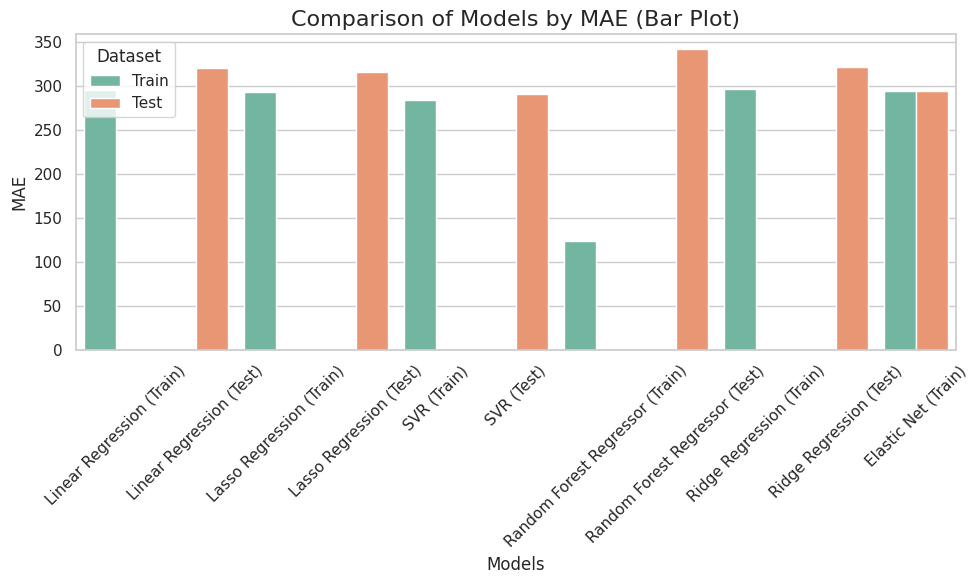

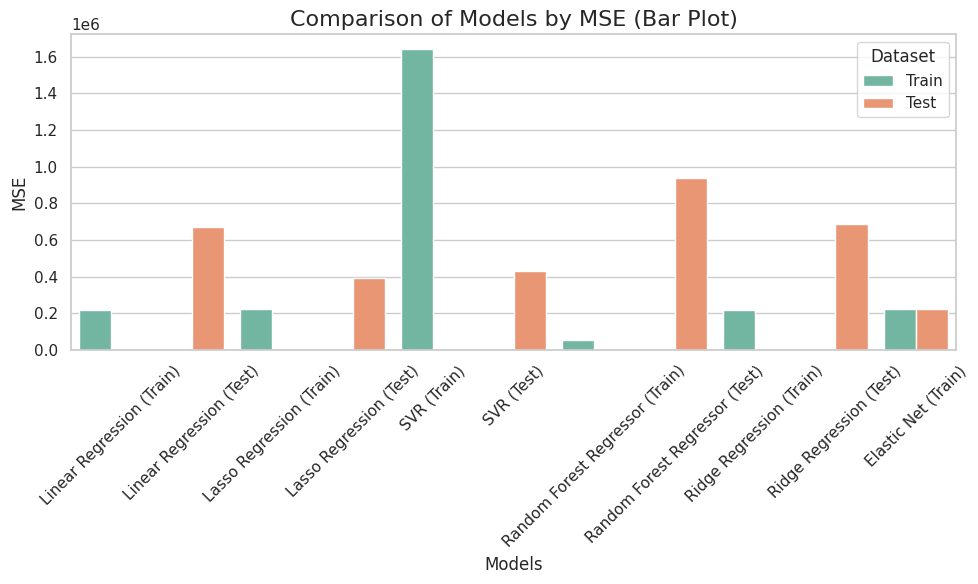

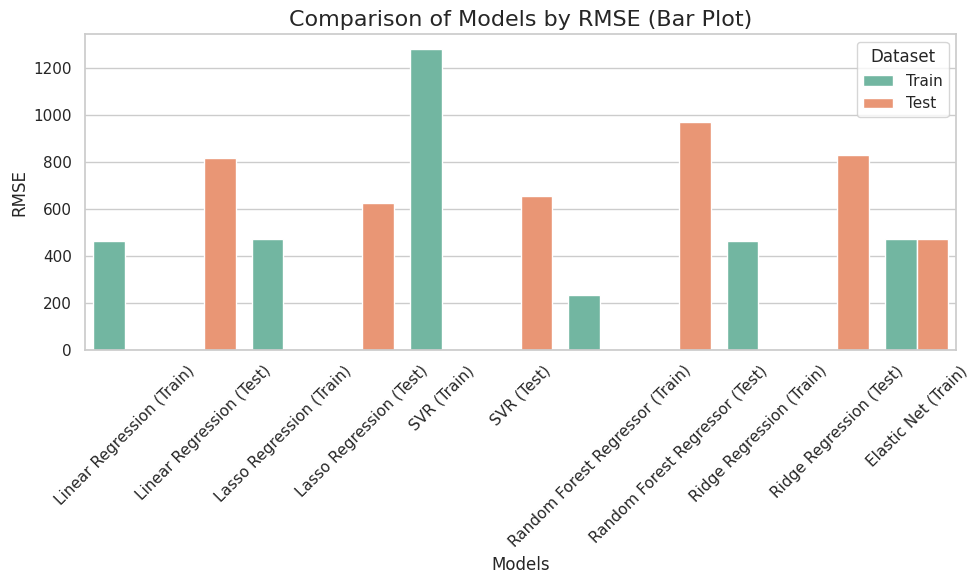

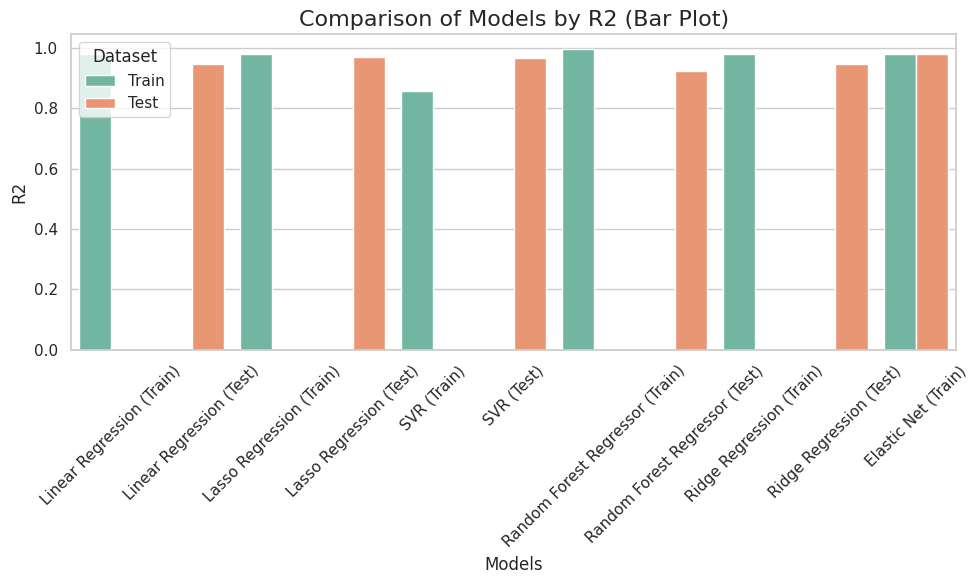

Line Plot:


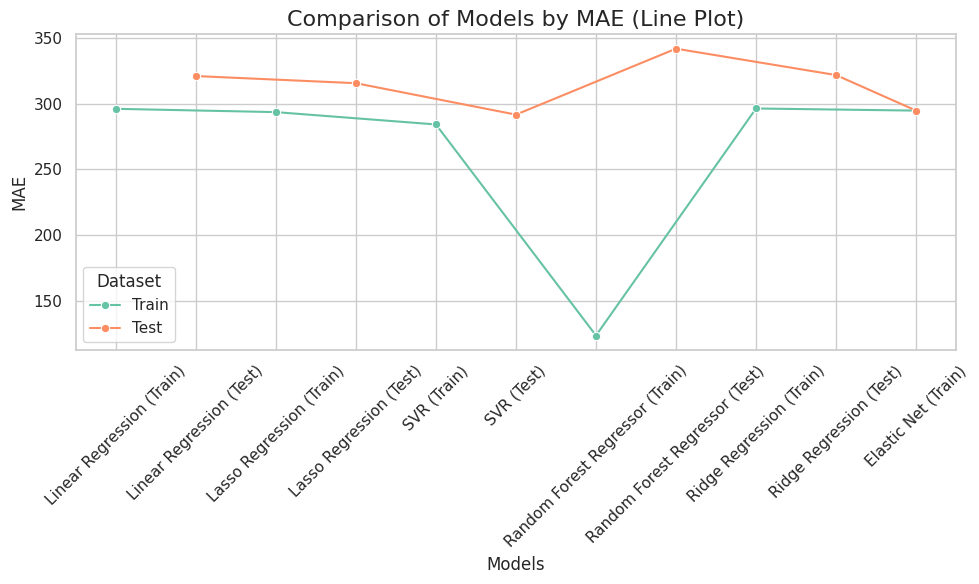

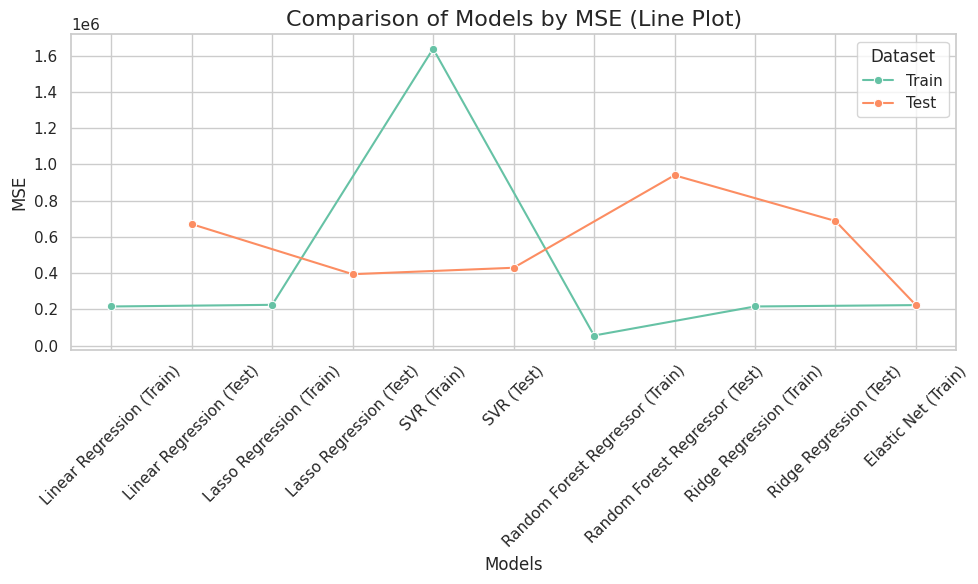

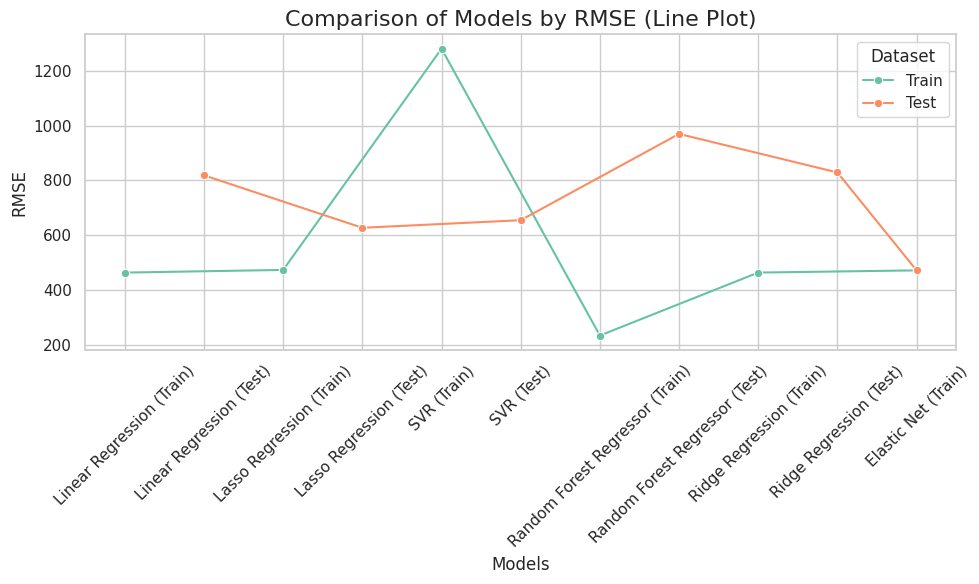

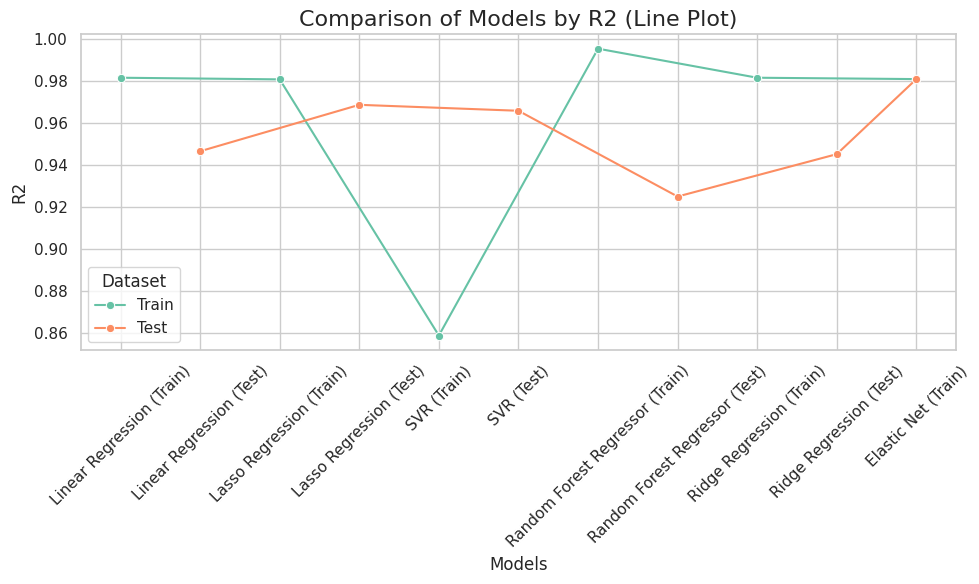

Scatter Plot:


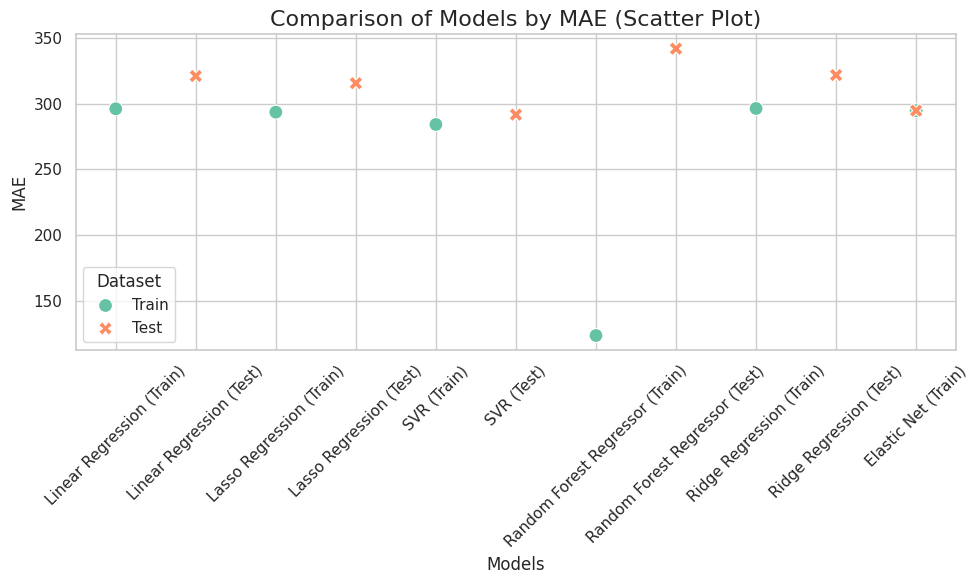

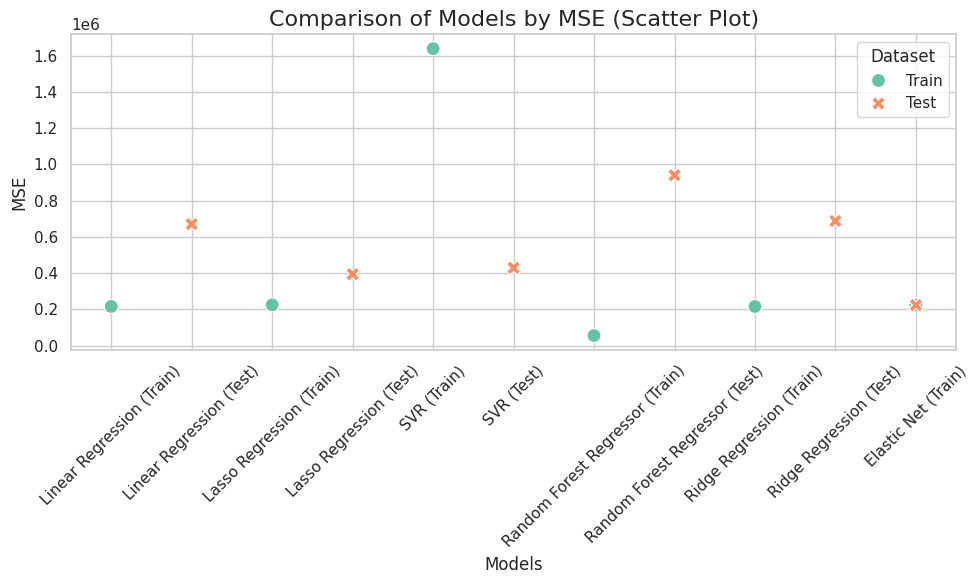

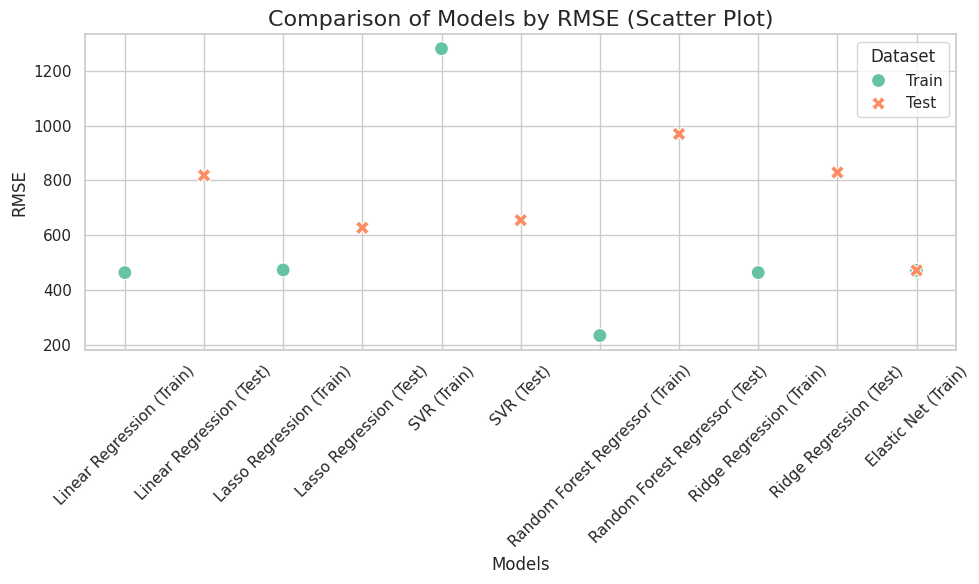

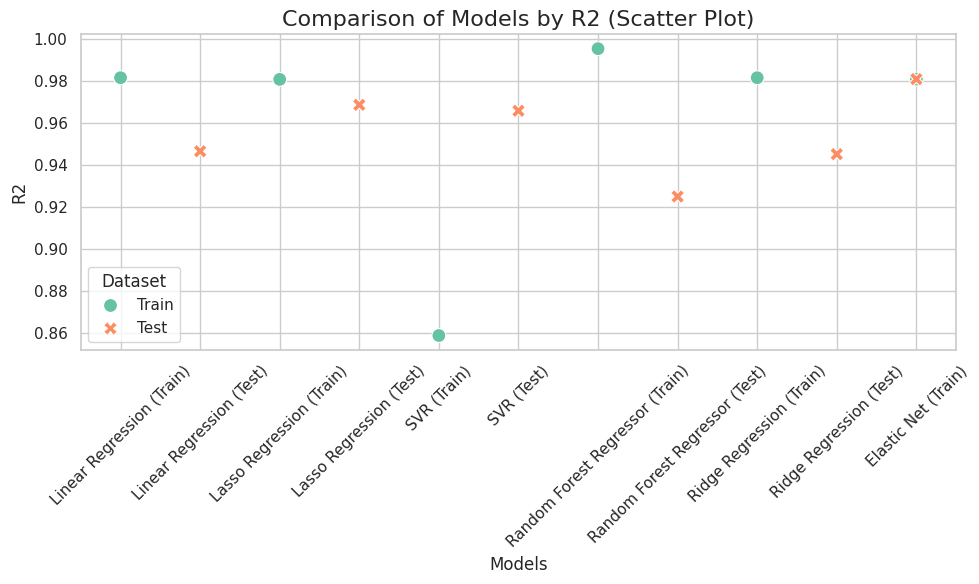

In [39]:
def plot_model_comparison(results, plot_type='bar'):
    sns.set(style="whitegrid")

    metrics = ['MAE', 'MSE', 'RMSE', 'R2']
    model_names = results['Model'].unique()

    # Create graphs for each metric
    for metric in metrics:
        plt.figure(figsize=(10, 6))

        if plot_type == 'bar':
            sns.barplot(data=results, x='Model', y=metric, hue='Dataset', palette='Set2')
            plt.title(f'Comparison of Models by {metric} (Bar Plot)', fontsize=16)
        elif plot_type == 'line':
            sns.lineplot(data=results, x='Model', y=metric, hue='Dataset', marker='o', palette='Set2')
            plt.title(f'Comparison of Models by {metric} (Line Plot)', fontsize=16)
        elif plot_type == 'scatter':
            sns.scatterplot(data=results, x='Model', y=metric, hue='Dataset', style='Dataset', s=100, palette='Set2')
            plt.title(f'Comparison of Models by {metric} (Scatter Plot)', fontsize=16)
        else:
            raise ValueError("Invalid plot_type. Choose from 'bar', 'line', or 'scatter'.")

        plt.ylabel(metric, fontsize=12)
        plt.xlabel('Models', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title='Dataset')
        plt.tight_layout()
        plt.show()

results['Dataset'] = ['Train', 'Test'] * 6

print("Bar Plot:")
plot_model_comparison(results, plot_type='bar')

print("Line Plot:")
plot_model_comparison(results, plot_type='line')

print("Scatter Plot:")
plot_model_comparison(results, plot_type='scatter')

In [59]:
# list with diff var
feature_names = ['area', 'rooms', 'bathrooms', 'parking_spaces', 'floor', 'hoa',
                 'rent_amount', 'property_tax', 'fire_insurance', 'animal_acept',
                 'animal_not_acept', 'furniture_furnished', 'furniture_not_furnished',
                 'city_Belo_Horizonte', 'city_Campinas', 'city_Porto_Alegre',
                 'city_Rio_de_Janeiro']

# outputing
def print_model_coefficients(model, model_name):
    try:
        print(f"{model_name} Intercept: {model.intercept_}")
    except AttributeError:
        print(f"{model_name} does not have an intercept.")

    try:
        if len(model.coef_.shape) == 1:  #Check if the coefficients are univariate
            coefficients = dict(zip(feature_names, model.coef_))
        else:  # If coefficients are multidimensional
            coefficients = {f"{feature}_{i}": coef for feature, coefs in zip(feature_names, model.coef_) for i, coef in enumerate(coefs)}

        print(f"{model_name} Coefficients:")
        for feature, coef in coefficients.items():
            print(f"{feature}: {coef}")
    except AttributeError:
        print(f"{model_name} does not have coefficients.")
    print("*" * 48)
    print("")

# output each model
print_model_coefficients(lin_reg_model, "Linear Regression")
print_model_coefficients(lasso_model, "Lasso Regression")
print_model_coefficients(ridge_model, "Ridge Regression")
print_model_coefficients(elastic_model, "Elastic Net")
print_model_coefficients(svr_model, "Support Vector Regression")

# get best. estimator for GridSearchCV
best_rf_model = rf_grid.best_estimator_

# Output importance for Random Forest
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Random Forest Feature Importances:")
print(feature_importance_df)



Linear Regression Intercept: 8.45540088112925e-18
Linear Regression Coefficients:
area: -0.003092046195284878
rooms: -0.009609212736732542
bathrooms: 0.014627578219865814
parking_spaces: -0.017640044379456044
floor: 0.0600667175596284
hoa: 0.0057414231088829155
rent_amount: 0.01818914376275837
property_tax: 0.9749546570679994
fire_insurance: -0.0017266484811946582
animal_acept: 0.0017266484811948664
animal_not_acept: 0.006696531069396457
furniture_furnished: -0.0066965310693962625
furniture_not_furnished: -0.013049460607158855
city_Belo_Horizonte: 0.001312488983167345
city_Campinas: -0.027860597163255348
city_Porto_Alegre: 0.010071963066867615
city_Rio_de_Janeiro: 0.018281581522396253
************************************************

Lasso Regression Intercept: 9.230552577972648e-18
Lasso Regression Coefficients:
area: -0.0
rooms: -0.0
bathrooms: 0.0
parking_spaces: -0.0
floor: 0.05509287476245475
hoa: 0.0
rent_amount: 0.01022790439938383
property_tax: 0.9645344301725788
fire_insurance

In [ ]:
# # Create a folder to save files if it does not exist
# output_dir = "saved_models"
# os.makedirs(output_dir, exist_ok=True)

# # Saving the model
# joblib.dump(lin_reg_model, os.path.join(output_dir, "linear_regression_model.pkl"))
# joblib.dump(svr_model, os.path.join(output_dir, "svr_model.pkl"))
# joblib.dump(rf_grid.best_estimator_, os.path.join(output_dir, "random_forest_model.pkl"))
# joblib.dump(lasso_model, os.path.join(output_dir, "lasso_model.pkl"))
# joblib.dump(ridge_model, os.path.join(output_dir, "ridge_model.pkl"))
# joblib.dump(elastic_model, os.path.join(output_dir, "elastic_model.pkl"))


# joblib.dump(x_scaler, os.path.join(output_dir, "x_scaler.pkl"))
# joblib.dump(y_scaler, os.path.join(output_dir, "y_scaler.pkl"))

# print(f"Models and scalers saved in folder: {output_dir}")

In [ ]:
# # Loading all files from the folder
# for filename in os.listdir(output_dir):
#     files.download(os.path.join(output_dir, filename))

♍ ***The results of coefficients and intersects are important for understanding the impact of each variable on the predicted value.***





# ***Comparisons and conclusions***

❎ ***Best Model:***

 **Lasso Regression** offers the best balance between training and test performance, avoiding overfitting while maintaining strong explanatory power.

⭕ ***Worst Model:***

Random Forest overfits the training data, with the highest test errors and reduced generalizability. It may require hyperparameter tuning to improve its performance.

🔷 **Overall Recommendation:**

Use Lasso Regression for production or forecasting, given its consistent performance on unseen data.

Consider SVR for datasets with non-linear relationships but monitor computational costs.

Avoid relying solely on Random Forest without further tuning due to its overfitting tendencies.


# ***Linear Regression***

Performs well on training data (R2: 0.981), but performance degrades on testing (R2: 0.947), indicating some overfitting.

Coefficients suggest the strongest influence comes from fire insurance (0.975), with smaller contributions from bathrooms, area, and furniture-furnished.

# ***Lasso Regression***

Best performance on test data (R2: 0.969, RMSE: 627.63), balancing bias and variance.

Eliminates irrelevant features with a regularization parameter (α=0.01).

Maintains interpretability while retaining critical predictors like fire insurance (0.964) and bathrooms (0.055).

# **Ridge**

Accuracy on training data: The high R2 value (0.98) shows that the model fits the data well, but is not overtrained.

# ***Elastic Net***

shows stable results on both training and test data, with high values (R2: 0.981)

# ***Support Vector Regressor (SVR)***


Moderate performance with R2: 0.966 (test) and MAE: 291.74.

Handles non-linear relationships well but exhibits higher variance on training data, as seen in RMSE: 1280.25.

# ***Random Forest Regressor***



Excellent fit on training data (R2: 0.995, MAE: 123.37) but struggles to generalize (R2: 0.925, MAE: 342.02), suggesting overfitting.

Best suited for capturing complex patterns but may need tuning (e.g., reducing tree depth or increasing regularization).